### Principal Component Analysis

1.  The main aim of the Principal Component Analysis (PCA) is to convert the high dimensional features into 2 dimensional features and capture the maximum variance in the dataset.

2.  Then apply logistic regression on the 2D dataset to visualize the results.

### Steps for the Project:-

1. Import all the necessary libraries

2. Load dataset

3. Perform EDA (basic exploration)

4. Split the dataset into independent and dependent variables

5. Split independent and dependent variables into training and testing data

6. Standardize data

7. Apply PCA to perform the dimansionality reduction

8. Visualize PCA results

9. Train Logistic Regression on reduced data

10. Evaluate model performance

11. Visualize decision regions

### Step 1: Import all the necessary libraries

In [2388]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from   sklearn.datasets        import load_wine
from   sklearn.model_selection import train_test_split,GridSearchCV  ## improvised  model
from   sklearn.preprocessing   import StandardScaler
from   sklearn.decomposition   import PCA
from   sklearn.linear_model    import LogisticRegression
from   sklearn.metrics         import accuracy_score, confusion_matrix, classification_report

### Step 2: Load dataset

In [2389]:
data = load_wine()


### get the data

print(data.data)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [2390]:
### get the columns

print(data.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [2391]:
### Construct the dataframe from the above data and columns

df = pd.DataFrame(data.data, columns = data.feature_names)

In [2392]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [2393]:
### Adding the target to the dataset

df['target'] = data.target

In [2394]:
### Display the dataframe

df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


### OBSERVATIONS:

1. The above dataset depicts about the wine quality features.

2. Based on the above wine quality, we need to predict the category of the wine(target) as the output.

### Step 3:-  Perform EDA (basic exploration)

In [2395]:
### get all the total records in the dataset

print("Total records in the dataset is:", len(df))

Total records in the dataset is: 178


In [2396]:
### get the shape of the dataset

print(df.shape)

(178, 14)


In [2397]:
### get the top five rows of the dataset

print(df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [2398]:
### get the bottom five rows of the dataset

print(df.tail())

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
173        0.61                  0.52             1.06              7.7  0.64   
174        0.75                  0.43             1.41              7.3  0.70   
175        0.69                  0.43             1.35             10.2  0.59   
176        0.68                  0.53             1.46              9.3  0.60   
177        0.76                  0.56             1.35              9.2  0.61   

     od280/od315_of_diluted_wines  pro

In [2399]:
### get all the columns used in the dataset

df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [2400]:
### get the information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

### OBSERVATIONS:

1. All the above input features are numerical in nature.

2. The output feature is integer in nature.

In [2401]:
## Get the descriptive statistics of the dataset

df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


### OBSERVATIONS:

1. The above dataset depicts about the statistical summary about the dataset.

In [2402]:
### Check if there are any NULL Values in the dataset

df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

### OBSERVATIONS:

1.  There are no NULL Values in the dataset.

In [2403]:
### Check for any duplicates in the dataset

df[df.duplicated()]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target


### OBSERVATIONS:

1.  There are no duplicate records in the dataset.

In [2404]:
### Rename 'od280/od315_of_diluted_wines' to 'od280_od315_ratio' 

df.rename(columns={
    'od280/od315_of_diluted_wines': 'diluted_wines'
}, inplace=True)


In [2405]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [2406]:
### Get the total count of all the categories of the target

df['target'].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

### OBSERVATIONS:

1.  There are three categories of the target used in the dataset.

### Step 4: Split the dataset into independent and dependent variables


In [2407]:
### Independent variable

X = df.drop(columns='target', axis=1)

In [2408]:
### Dependent variable

Y = df['target']

In [2409]:
print(X)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

In [2410]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64


In [2411]:
### get the count of all the targets

Y.value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

### Step 5: Split independent and dependent variables into training and testing data

In [2412]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=42,stratify=Y)

In [2413]:
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
104,12.51,1.73,1.98,20.5,85.0,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672.0
36,13.28,1.64,2.84,15.5,110.0,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880.0
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420.0
150,13.50,3.12,2.62,24.0,123.0,1.40,1.57,0.22,1.25,8.60,0.59,1.30,500.0
34,13.51,1.80,2.65,19.0,110.0,2.35,2.53,0.29,1.54,4.20,1.10,2.87,1095.0
154,12.58,1.29,2.10,20.0,103.0,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640.0


In [2414]:
X_test

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline
35,13.48,1.81,2.41,20.5,100.0,2.70,2.98,0.26,1.86,5.10,1.04,3.47,920.0
93,12.29,2.83,2.22,18.0,88.0,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
28,13.87,1.90,2.80,19.4,107.0,2.95,2.97,0.37,1.76,4.50,1.25,3.40,915.0
87,11.65,1.67,2.62,26.0,88.0,1.92,1.61,0.40,1.34,2.60,1.36,3.21,562.0
42,13.88,1.89,2.59,15.0,101.0,3.25,3.56,0.17,1.70,5.43,0.88,3.56,1095.0
18,14.19,1.59,2.48,16.5,108.0,3.30,3.93,0.32,1.86,8.70,1.23,2.82,1680.0
60,12.33,1.10,2.28,16.0,101.0,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680.0
98,12.37,1.07,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660.0
130,12.86,1.35,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630.0


In [2415]:
print("Shape of the input training data is:", X_train.shape)

print("Shape of the input testing  data is:", X_test.shape)

Shape of the input training data is: (133, 13)
Shape of the input testing  data is: (45, 13)


In [2416]:
Y_train

8      0
104    1
36     0
78     1
2      0
      ..
63     1
150    2
34     0
154    2
159    2
Name: target, Length: 133, dtype: int64

In [2417]:
Y_test

35     0
93     1
7      0
28     0
87     1
42     0
18     0
60     1
98     1
130    2
62     1
102    1
155    2
156    2
20     0
121    1
64     1
22     0
51     0
177    2
143    2
164    2
23     0
48     0
118    1
84     1
10     0
66     1
38     0
94     1
39     0
132    2
100    1
138    2
173    2
108    1
58     0
176    2
134    2
105    1
166    2
112    1
14     0
129    1
76     1
Name: target, dtype: int64

In [2418]:
print("Shape of the output training data is:", Y_train.shape)

print("Shape of the output testing  data is:", Y_test.shape)

Shape of the output training data is: (133,)
Shape of the output testing  data is: (45,)


### Step 6: Standardize data

In [2419]:
from sklearn.preprocessing import StandardScaler

### create an object for Standard Scaler

sc = StandardScaler()

### Standardize the inputs

X_train_scaled = sc.fit_transform(X_train)

In [2420]:
X_test_scaled = sc.transform(X_test)

In [2421]:
print(X_train_scaled)

[[ 2.33041778 -0.63796267 -0.74427132 ...  0.57887517  0.37385664
   0.97971254]
 [-0.57363985 -0.55510229 -1.45939437 ...  0.4011093   1.42836362
  -0.248245  ]
 [ 0.39020686 -0.63796267  1.77747839 ...  0.62331663  0.27133513
   0.43651416]
 ...
 [ 0.67810913 -0.49065532  1.06235534 ...  0.6677581   0.4031485
   1.1443181 ]
 [-0.48601742 -0.96019751 -1.00773771 ... -1.64319817 -1.53011429
  -0.35359256]
 [ 0.64055666 -0.61034255  1.02471728 ... -1.68763964 -1.1932579
  -0.41943479]]


In [2422]:
print(X_test_scaled)

[[ 0.64055666 -0.48144861  0.15904201  0.23809346  0.          0.66522952
   1.033603   -0.85892977  0.43758133  0.03911337  0.4011093   1.28190432
   0.56819862]
 [-0.84902463  0.45763577 -0.55608104 -0.5073498  -0.80397259  0.26690642
   0.2688376  -0.94361299  0.66030083 -1.21261     0.88996543  1.0329235
  -1.50583153]
 [ 1.36657106 -0.16842048  0.91180311 -0.62662072  1.40695203  0.50590028
   0.5412198  -0.43551369 -0.60748707  0.01789772  0.48999223  1.44300955
   1.80274037]
 [ 1.12873876 -0.39858822  1.62692617 -0.08990158  0.46898401  1.06355262
   1.02312676  0.07258561  0.26625864 -0.21547444  1.3343801   1.17938281
   0.55173806]
 [-1.65014397 -0.61034255  0.94944117  1.87806863 -0.80397259 -0.57753854
  -0.40164165  0.32663527 -0.45329665 -1.02166915  1.82323623  0.90111013
  -0.61037725]
 [ 1.14125625 -0.40779493  0.836527   -1.40188171  0.06699772  1.54154034
   1.64122482 -1.62107872  0.16346503  0.17913666 -0.30995417  1.41371769
   1.1443181 ]
 [ 1.52929843 -0.683996

### OBSERVATIONS:

1. After performing the feature scaling operation on the inputs, all the input data has been scaled in one range.

2. Now we need to perform PCA on the input data to convert it into 2D feature and get only two dimensions.

### Step 7: Apply PCA to perform the dimansionality reduction

In [2423]:
### Now we use PCA to reduce and convert all the 13 input features into 2 features

from sklearn.decomposition import PCA

### create an object for pca
pca = PCA(n_components=2)

### use the pca to scale the inputs

X_train_pca = pca.fit_transform(X_train)

In [2424]:
X_train_pca

array([[ 2.97506275e+02, -9.00138240e+00],
       [-7.56952858e+01, -1.35231120e+01],
       [ 1.32786212e+02,  7.26311288e+00],
       [ 3.32615975e+00,  3.57737305e+01],
       [ 4.37530758e+02, -7.61953975e+00],
       [-8.75573265e+01, -7.19681736e+00],
       [-3.69634754e+02, -7.73400849e+00],
       [ 5.72277175e+02, -2.23412989e+01],
       [ 5.37372311e+02, -1.66534316e+01],
       [-3.32737620e+02, -1.34312754e+01],
       [ 5.32881355e+02,  9.54200598e+00],
       [-6.75158165e+01, -4.69841275e+00],
       [-2.67727024e+02, -1.37977134e+01],
       [-2.75628183e+02, -7.48602252e+00],
       [-4.02182694e+02,  1.59331650e+01],
       [-2.52643145e+02, -9.04888615e+00],
       [ 7.67559371e+02, -9.08526258e+00],
       [ 5.37490651e+02, -9.48217105e+00],
       [-3.19619194e+02, -8.84633685e+00],
       [-3.40647571e+02, -8.29732511e+00],
       [-3.13588532e+02, -5.82855892e+00],
       [-2.84347065e+02,  6.64702653e+00],
       [ 6.27775862e+02,  2.59881901e+00],
       [ 4.

In [2425]:
X_test_pca = pca.transform(X_test)

In [2426]:
X_test_pca

array([[ 1.72557037e+02, -3.37676060e+00],
       [-4.57543070e+02, -3.08792307e+00],
       [ 5.47905921e+02,  1.01590948e+01],
       [ 1.67701563e+02,  3.68018296e+00],
       [-1.85643501e+02, -8.21673819e+00],
       [ 3.47570065e+02, -5.96250404e+00],
       [ 9.32583541e+02, -1.03777174e+01],
       [-6.73601605e+01,  2.19623524e+00],
       [-8.76153239e+01, -1.03226477e+01],
       [-1.16941970e+02,  2.42363444e+01],
       [-1.17492721e+02, -3.75929441e+00],
       [-3.09391049e+02,  4.08132923e+00],
       [-2.25499073e+01, -6.43487055e+00],
       [-2.67558479e+02, -5.67391703e+00],
       [ 3.31275650e+01,  2.52414841e+01],
       [-2.82007332e+02,  2.47734344e+01],
       [-3.92245711e+02,  1.16584263e+01],
       [ 2.87569290e+02, -4.76353269e+00],
       [ 5.17382847e+02, -1.62314335e+01],
       [-1.87461755e+02, -1.13590466e-01],
       [-1.97528373e+02, -4.10312175e+00],
       [-1.32579252e+02, -7.26057333e+00],
       [ 2.67446548e+02, -1.03308186e+01],
       [ 3.

### OBSERVATIONS:

1. After applying PCA on the inputs, all the thirteen input features has been converted into two features using dimensionality reduction.

### Step 8: Visualize PCA results

In [2427]:
X_train_pca[:,0]

array([ 297.50627522,  -75.69528577,  132.78621188,    3.32615975,
        437.53075758,  -87.55732645, -369.63475378,  572.27717481,
        537.3723107 , -332.73762016,  532.88135523,  -67.51581655,
       -267.72702416, -275.62818282, -402.18269384, -252.64314517,
        767.55937132,  537.4906513 , -319.61919352, -340.64757101,
       -313.58853218, -284.34706527,  627.77586179,  402.3804218 ,
         83.02301132, -117.84582563, -252.57331871,  532.3986122 ,
       -297.32788941, -232.46881194, -367.61904791,  402.39551097,
       -277.61560695, -297.35804829,  -69.42231876, -297.63688589,
        -87.43259708, -185.60513467,  237.58996486,  -62.62146856,
       -227.5997034 ,  332.74739813,    2.61778278,  -67.25573214,
       -367.69424046,  297.52006969,  190.77847863,  522.54197171,
        242.63413633,   22.63373978,   97.49239083,  488.12780098,
        137.72025223, -183.6316621 ,  562.73210993,  447.38071952,
       -227.55912181,  -27.63469594, -217.28489249,  -12.05325

In [2428]:
X_train_pca[:,1]

array([-9.00138240e+00, -1.35231120e+01,  7.26311288e+00,  3.57737305e+01,
       -7.61953975e+00, -7.19681736e+00, -7.73400849e+00, -2.23412989e+01,
       -1.66534316e+01, -1.34312754e+01,  9.54200598e+00, -4.69841275e+00,
       -1.37977134e+01, -7.48602252e+00,  1.59331650e+01, -9.04888615e+00,
       -9.08526258e+00, -9.48217105e+00, -8.84633685e+00, -8.29732511e+00,
       -5.82855892e+00,  6.64702653e+00,  2.59881901e+00, -1.71237846e+01,
        2.24816905e+01, -1.96039634e+01, -4.98409652e+00, -1.55467198e+01,
        5.77295806e+00,  7.29707371e-01, -6.74497292e+00, -1.60741200e+01,
       -8.47477649e+00,  4.75879228e+00, -6.84214331e-01, -8.10341553e+00,
       -1.89947741e-02, -8.41985343e+00, -3.76242780e+00, -1.06923970e+01,
       -7.44217299e+00,  4.43570241e+00,  2.08139755e+00,  8.34703662e+00,
       -1.07560450e+01, -7.92754685e+00,  5.81857839e+01, -8.34162245e+00,
       -8.56313020e-01,  1.51979271e+00, -5.93606201e+00,  2.23872093e+01,
        4.21152796e+00, -

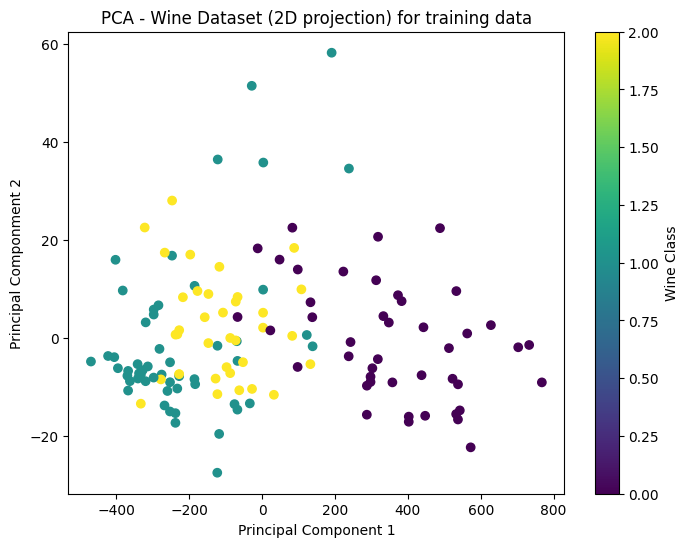

In [2429]:
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1],c=Y_train)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Componment 2')
plt.title('PCA - Wine Dataset (2D projection) for training data')
plt.colorbar(label='Wine Class')
plt.show()

## OBSERVATIONS:

1.  A Principal Component Analysis has been plotted that depicts the relation between two Principal Components for the training data in the dataset.

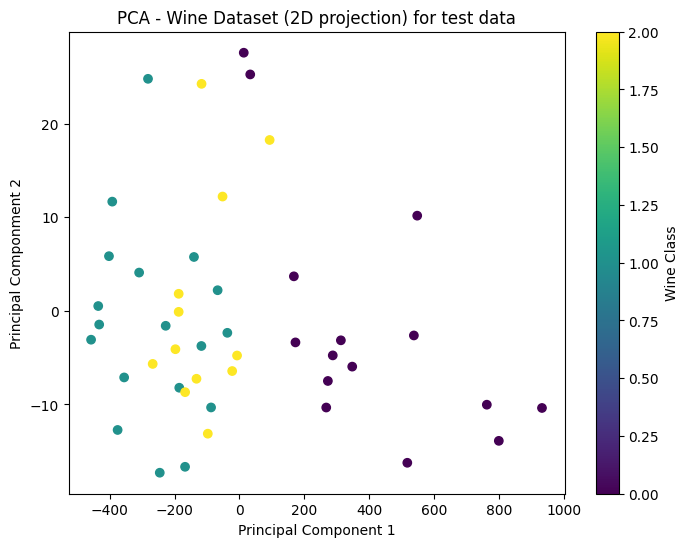

In [2430]:
plt.figure(figsize=(8,6))
plt.scatter(X_test_pca[:,0], X_test_pca[:,1],c=Y_test)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Componment 2')
plt.title('PCA - Wine Dataset (2D projection) for test data')
plt.colorbar(label='Wine Class')
plt.show()

### OBSERVATIONS:

1.  A Principal Component Analysis has been plotted that depicts the relation between two Principal Components for the testing data in the dataset.

### Step 9: Train Logistic Regression on reduced data

In [2431]:
X_train_pca

array([[ 2.97506275e+02, -9.00138240e+00],
       [-7.56952858e+01, -1.35231120e+01],
       [ 1.32786212e+02,  7.26311288e+00],
       [ 3.32615975e+00,  3.57737305e+01],
       [ 4.37530758e+02, -7.61953975e+00],
       [-8.75573265e+01, -7.19681736e+00],
       [-3.69634754e+02, -7.73400849e+00],
       [ 5.72277175e+02, -2.23412989e+01],
       [ 5.37372311e+02, -1.66534316e+01],
       [-3.32737620e+02, -1.34312754e+01],
       [ 5.32881355e+02,  9.54200598e+00],
       [-6.75158165e+01, -4.69841275e+00],
       [-2.67727024e+02, -1.37977134e+01],
       [-2.75628183e+02, -7.48602252e+00],
       [-4.02182694e+02,  1.59331650e+01],
       [-2.52643145e+02, -9.04888615e+00],
       [ 7.67559371e+02, -9.08526258e+00],
       [ 5.37490651e+02, -9.48217105e+00],
       [-3.19619194e+02, -8.84633685e+00],
       [-3.40647571e+02, -8.29732511e+00],
       [-3.13588532e+02, -5.82855892e+00],
       [-2.84347065e+02,  6.64702653e+00],
       [ 6.27775862e+02,  2.59881901e+00],
       [ 4.

In [2432]:
Y_train

8      0
104    1
36     0
78     1
2      0
      ..
63     1
150    2
34     0
154    2
159    2
Name: target, Length: 133, dtype: int64

In [2433]:
from sklearn.linear_model import LogisticRegression


### create an object for LogisticRegression

log = LogisticRegression()

### using the object for LogisticRegression train the model

log.fit(X_train_pca, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### OBSERVATIONS:

1. The Logistic Regression model has been trained with the help of the reduced training data that has been performed using PCA.

### Step 10: Evaluate model performance

In [2434]:
Y_pred_pca = log.predict(X_test_pca)

In [2435]:
Y_pred_pca

array([0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 1, 2, 1, 0, 1,
       1])

In [2436]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


ac = accuracy_score(Y_test,Y_pred_pca)

print("Accuracy of the model is:", (ac * 100.0))

Accuracy of the model is: 73.33333333333333


In [2437]:
cm = confusion_matrix(Y_test,Y_pred_pca)

print("Confusion_matrix is:", (cm))

Confusion_matrix is: [[13  0  2]
 [ 0 16  2]
 [ 0  8  4]]


In [2438]:
cr = classification_report(Y_test, Y_pred_pca)

print(cr)

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.67      0.89      0.76        18
           2       0.50      0.33      0.40        12

    accuracy                           0.73        45
   macro avg       0.72      0.70      0.70        45
weighted avg       0.73      0.73      0.72        45

